# Working on Real Project with Python on 'COVID-19 Dataset'

(A part of Big Data Analysis)

-----

# COVID-19 SMALL DATASET

-----

We have taken a small dataset of Covid-19,just for your understanding purpose. You have to work on the original dataset which contains about 19000 rows.

The data used here is till 29-April-2020 and has records as on 29-April-2020.

This data is available as a CSV file, downloaded from Kaggle.

We will analyze this data using the Pandas Dataframe.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\user\Documents\Real project on Data Science\Covid19 Dataset\Covid_19_Data.csv")

In [3]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [4]:
data.shape

(321, 6)

In [5]:
data.count() # count only non null values

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [6]:
# Lets find out null values
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [7]:
# Now we will see this non-null and null counts through heatmap for better visualization

In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

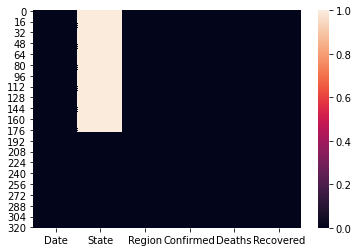

In [10]:
sns.heatmap(data.isnull())
plt.show()

In [11]:
# In above image, White area indicates the null means missing values and rest black area with non-null values.

------

Q1. Show the number of Confirmed, Deaths and Recovered cases in each Region

In [12]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [15]:
data.groupby('Region').sum().head(50)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
Antigua and Barbuda,24,3,11
Argentina,4285,214,1192
Armenia,1932,30,900
Australia,6752,91,5715


In [18]:
data.groupby('Region').Confirmed.sum().sort_values(ascending=False).head()

Region
US        1039909
Spain      236899
Italy      203591
France     166543
UK         166441
Name: Confirmed, dtype: int64

In [43]:
data.groupby('Region')[['Confirmed','Recovered']].sum()

,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
Venezuela,331,142
Vietnam,270,222
West Bank and Gaza,344,71


Q2. Remove all the records where Confirmed Cases is Less Than 10.

In [20]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [28]:
data = data[~(data['Confirmed']<10)]

In [31]:
data['Confirmed'].sort_values()

156        10
70         10
59         10
318        11
217        11
        ...  
57     165093
168    165221
80     203591
153    236899
265    299691
Name: Confirmed, Length: 304, dtype: int64

Q3. In which Region, maximum number of Confirmed cases were recorded?

In [32]:
data.groupby('Region').Confirmed.sum().sort_values(ascending=False)

Region
US            1039909
Spain          236899
Italy          203591
France         166536
UK             166432
               ...   
Seychelles         11
Burundi            11
Holy See           10
Gambia             10
Suriname           10
Name: Confirmed, Length: 180, dtype: int64

Q4. In which Region, minimum number of Death cases were recorded?

In [33]:
data.groupby('Region').Confirmed.sum().sort_values()

Region
Suriname           10
Gambia             10
Holy See           10
Burundi            11
Seychelles         11
               ...   
UK             166432
France         166536
Italy          203591
Spain          236899
US            1039909
Name: Confirmed, Length: 180, dtype: int64

Q5. How many Confirmed, Deaths & Recovered cases were reported from India till 29 April 2020?

In [41]:
data[data['Region']=='India'][['Region','Confirmed','Deaths','Recovered']]

,Region,Confirmed,Deaths,Recovered
74,India,33062,1079,8437


Q6- A) Sort the entire data w.r.t No. of Confirmed cases in ascending order.

In [45]:
data.sort_values(by = 'Confirmed').head(10)

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
256,4/29/2020,Montserrat,UK,11,1,2
144,4/29/2020,NaN,Seychelles,11,0,6
27,4/29/2020,NaN,Burundi,11,1,4
306,4/29/2020,Turks and Caicos Islands,UK,12,1,5
118,4/29/2020,NaN,Nicaragua,13,3,7


Q6-B) Sort the entire data w.r.t No. of Recovered cases in descending order.

In [46]:
data.sort_values(by = 'Recovered',ascending= False).head(10)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
57,4/29/2020,NaN,France,165093,24087,48228
167,4/29/2020,NaN,Turkey,117589,3081,44040
22,4/29/2020,NaN,Brazil,79685,5513,34132
158,4/29/2020,NaN,Switzerland,29407,1716,22600
78,4/29/2020,NaN,Ireland,20253,1190,13386
